# SGDClassifier on MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
import matplotlib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data / 255.0, mnist.target.astype(int)

In [3]:
X.shape, y.shape  # Check the shape of the dataset

((70000, 784), (70000,))

# Train a SGDClassifier for Binary Classification

5


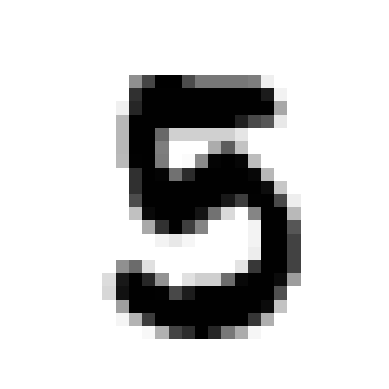

In [4]:
test_index = 66043
digit = X[test_index]
digit_image = digit.reshape(28, 28)
print(y[test_index])
plt.imshow(digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

6


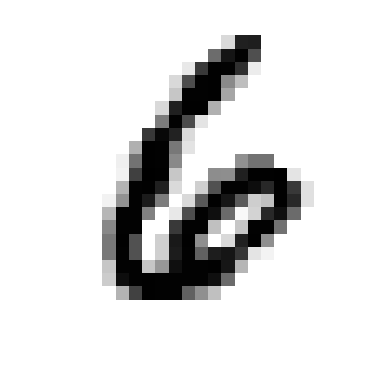

In [14]:
test_index = np.where(y == 6)[0][0]
digit_6 = X[test_index]
digit_image_6 = digit_6.reshape(28, 28)
print(y[test_index])
plt.imshow(digit_image_6, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train binary classifier for digit 6

In [6]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [7]:
y_test_6[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [7]:
# creat SGDClassifier & train it on the training set
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, loss='log_loss', max_iter=1000)  
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(loss='log_loss', random_state=42)

In [12]:
prediction = sgd_clf.predict([digit])
print("Prediction:", prediction[0])

Prediction: False


In [15]:
prediction = sgd_clf.predict([digit_6])
print("Prediction:", prediction[0])

Prediction: True


# Evaluate Performance

In [17]:
sgd_clf_base = SGDClassifier(random_state=42, max_iter=5, loss='log_loss')

In [18]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_6):
    clone_clf = clone(sgd_clf_base)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_6[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_6[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Accuracy:",n_correct / len(y_pred))

Accuracy: 0.9819467509508759
Accuracy: 0.9832860127497723


: 

# Confusion Matrix

In [8]:
# cross_val_predict()
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

: 

In [80]:
# building confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6, predictions)

array([[50189,   310],
       [  598,  4903]])

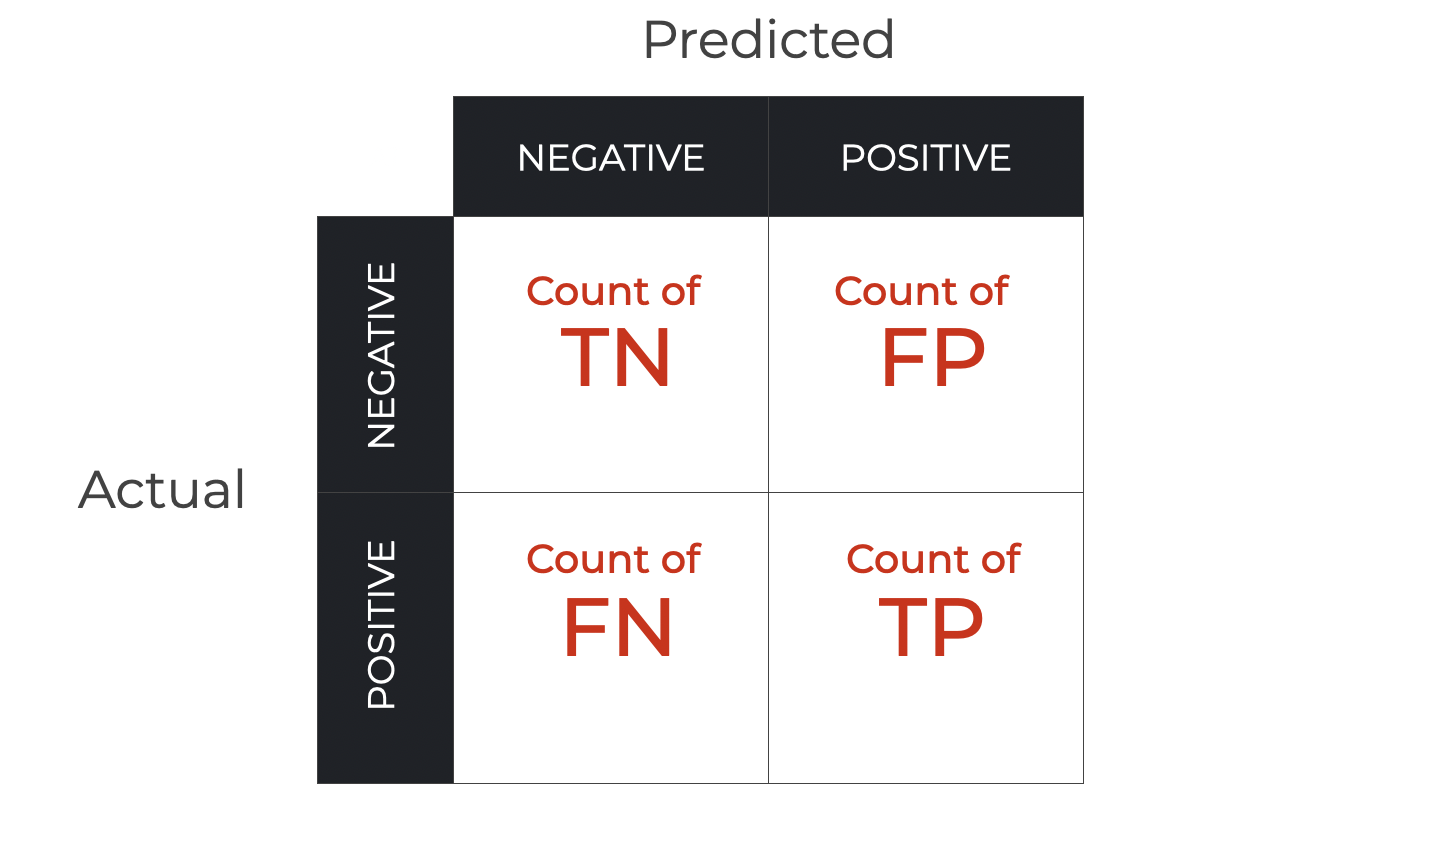

# Precision & Recall

In [81]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_6, predictions)

0.9405332821791674

In [82]:
recall_score(y_train_6, predictions)

0.891292492274132

In [83]:
from sklearn.metrics import f1_score
f1_score(y_train_6, predictions)

0.9152510733619563

## Precision/Recall Tradeoff

In [84]:
# we use the "digit" variabel again, which contains a 6
y_scores = sgd_clf.decision_function([digit_6])
y_scores

array([7.34356797])

In [85]:
threshold = 0
y_digit_pred = (y_scores > threshold)

y_digit_pred

array([ True])

In [86]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv=3, method="decision_function")

In [87]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_6, y_scores)

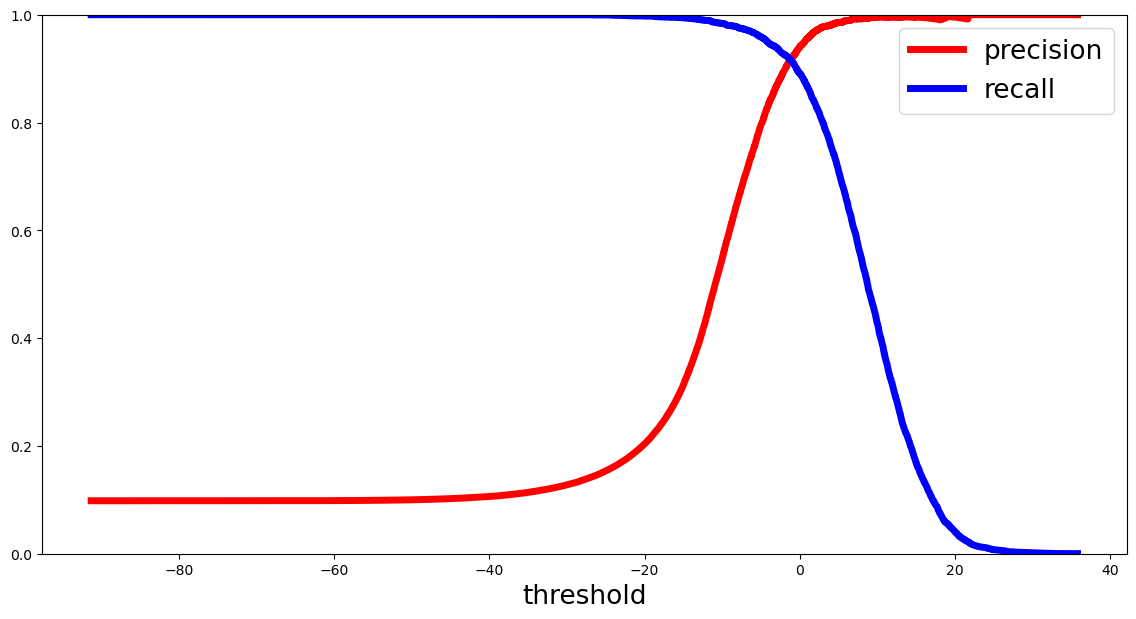

In [90]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

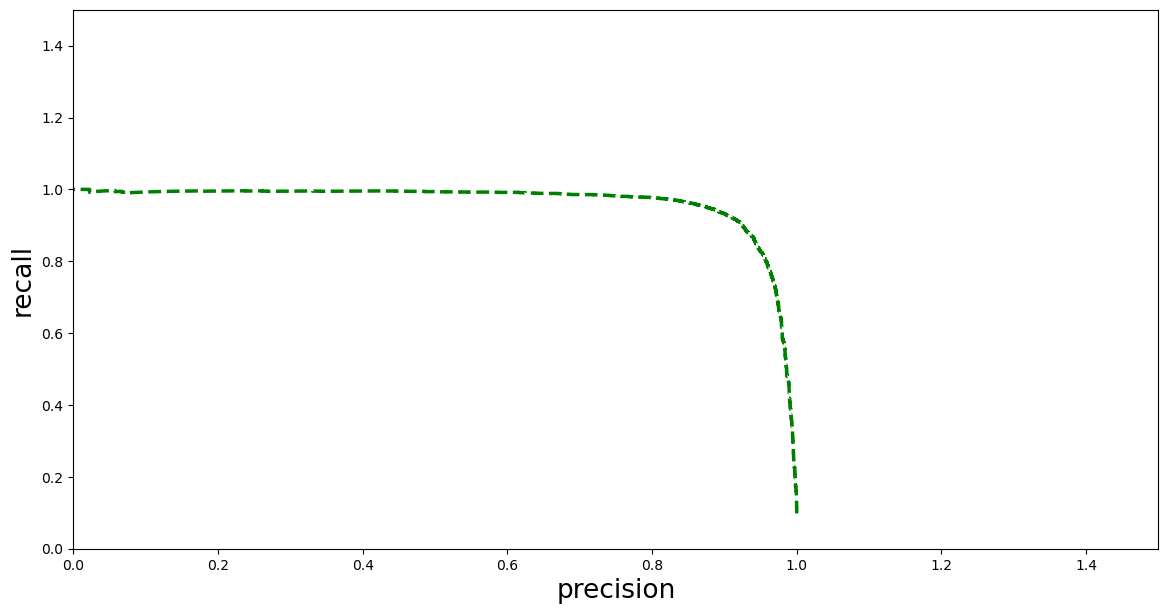

In [55]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## ROC Curve and ROC AUC Score

In [57]:
# compute true positive rate and false positive rate
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_6, y_scores)


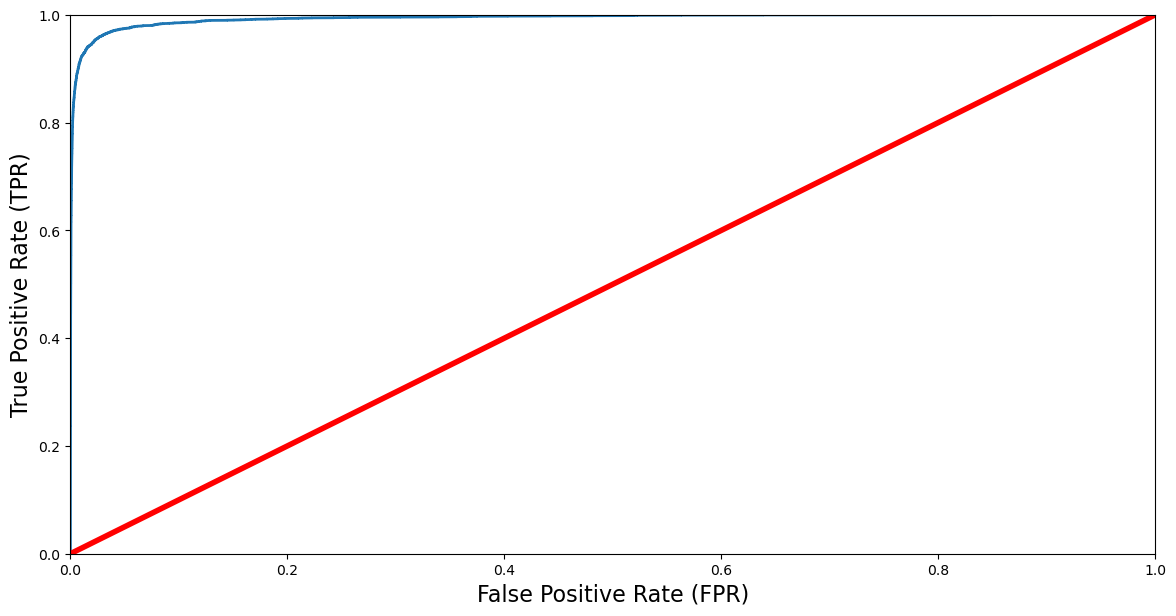

In [58]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [59]:
# computing ROC AUC
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_train_6, y_scores)
print("ROC-AUC-Score:", score)

ROC-AUC-Score: 0.9933324141663185


## Train the SGDClassifier on Multiclass

In [91]:
# Initialize SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# Train the classifier
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

## Evaluate the Model with Bootstrapping

In [92]:
# Bootstrapping for evaluation
n_bootstrap = 100
accuracy_scores = []

for _ in range(n_bootstrap):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_sample, y_sample = X_test[indices], y_test[indices]
    accuracy_scores.append(sgd_clf.score(X_sample, y_sample))

print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")

Mean Accuracy: 0.9104


## Classification Metrics

In [96]:
# Generate predictions
y_pred = sgd_clf.predict(X_test)

In [97]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1381
           1       0.94      0.97      0.96      1575
           2       0.89      0.91      0.90      1398
           3       0.91      0.88      0.89      1428
           4       0.95      0.88      0.91      1365
           5       0.89      0.85      0.87      1263
           6       0.94      0.96      0.95      1375
           7       0.92      0.94      0.93      1459
           8       0.89      0.84      0.86      1365
           9       0.83      0.90      0.86      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



## Confusion Matrix for Multiclass Classification

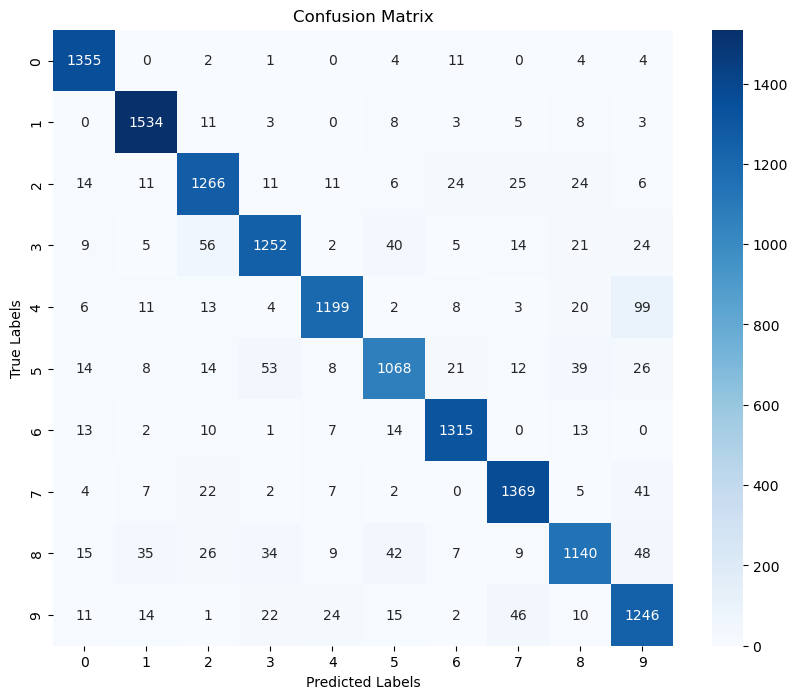

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Compute confusion matrix
conf_matrixb = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [100]:
conf_matrix

array([[1355,    0,    2,    1,    0,    4,   11,    0,    4,    4],
       [   0, 1534,   11,    3,    0,    8,    3,    5,    8,    3],
       [  14,   11, 1266,   11,   11,    6,   24,   25,   24,    6],
       [   9,    5,   56, 1252,    2,   40,    5,   14,   21,   24],
       [   6,   11,   13,    4, 1199,    2,    8,    3,   20,   99],
       [  14,    8,   14,   53,    8, 1068,   21,   12,   39,   26],
       [  13,    2,   10,    1,    7,   14, 1315,    0,   13,    0],
       [   4,    7,   22,    2,    7,    2,    0, 1369,    5,   41],
       [  15,   35,   26,   34,    9,   42,    7,    9, 1140,   48],
       [  11,   14,    1,   22,   24,   15,    2,   46,   10, 1246]])